<a href="https://colab.research.google.com/github/qkrjuyeol/multi-cctv/blob/main/%EC%98%81%EC%83%81_%EA%B0%9D%EC%B2%B4%ED%83%90%EC%A7%80_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8B%A8%EC%9C%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 설치 (Colab 환경)
!pip install ultralytics requests

In [ ]:
# 2. 라이브러리 import
from ultralytics import YOLO
import requests
import json
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

In [ ]:
# 3. YOLOv8 모델 로드
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.4MB/s]


In [ ]:
# 4. 테스트용 이미지 경로
!wget https://ultralytics.com/images/bus.jpg -O test_image.jpg
image_path = 'test_image.jpg'

In [ ]:
# 5. 객체 탐지
results = model(image_path)
# 6. 탐지된 객체 정보 추출
logs = []
for box in results[0].boxes:
    cls_id = int(box.cls)  # 클래스 ID
    cls_name = results[0].names[cls_id]  # 클래스 이름
    xyxy = box.xyxy.tolist()[0]  # [x1, y1, x2, y2]
    conf = float(box.conf)  # 신뢰도

    log_entry = {
        'class_id': cls_id,
        'class_name': cls_name,
        'bbox': xyxy,
        'confidence': conf
    }
    logs.append(log_entry)


image 1/1 /content/test_image.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 261.6ms
Speed: 12.2ms preprocess, 261.6ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
# 7. 로그 출력
print("탐지 결과 로그:")
print(json.dumps(logs, indent=2))

탐지 결과 로그:
[
  {
    "class_id": 5,
    "class_name": "bus",
    "bbox": [
      22.87126922607422,
      231.27731323242188,
      805.002685546875,
      756.84033203125
    ],
    "confidence": 0.8734486699104309
  },
  {
    "class_id": 0,
    "class_name": "person",
    "bbox": [
      48.55046844482422,
      398.5522155761719,
      245.34556579589844,
      902.7026977539062
    ],
    "confidence": 0.8656910061836243
  },
  {
    "class_id": 0,
    "class_name": "person",
    "bbox": [
      669.472900390625,
      392.1861267089844,
      809.7201538085938,
      877.0354614257812
    ],
    "confidence": 0.8528357148170471
  },
  {
    "class_id": 0,
    "class_name": "person",
    "bbox": [
      221.5172882080078,
      405.79864501953125,
      344.9706115722656,
      857.53662109375
    ],
    "confidence": 0.8252248764038086
  },
  {
    "class_id": 0,
    "class_name": "person",
    "bbox": [
      0.0,
      550.5250244140625,
      63.00695037841797,
      873.442932

In [ ]:
# 8. 서버로 전송
server_url = 'http://your-server-address/log'
headers = {'Content-Type': 'application/json'}

response = requests.post(server_url, headers=headers, json={'detections': logs})

# 9. 서버 응답 출력
print(f"서버 응답 코드: {response.status_code}")
print(f"서버 응답 내용: {response.text}")

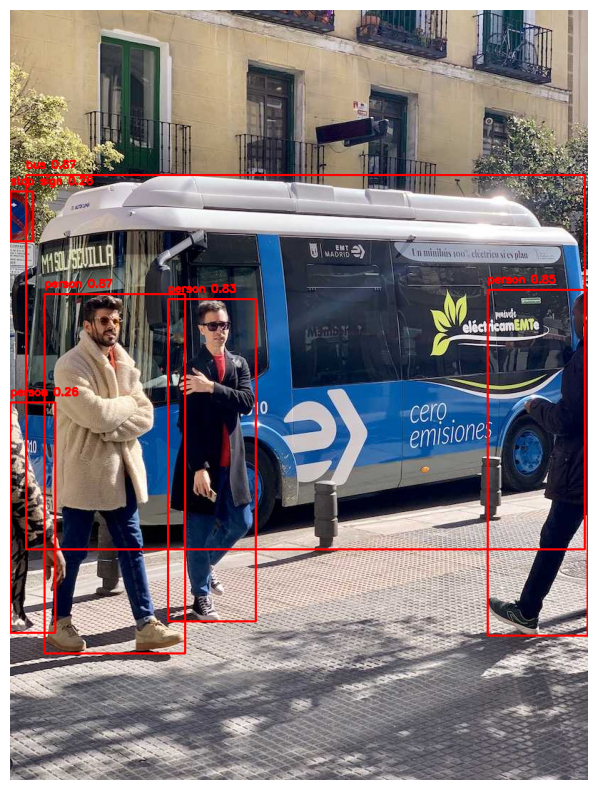

In [ ]:
# 9. 박스 그려진 이미지 시각화
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
    cls_id = int(box.cls)
    cls_name = results[0].names[cls_id]
    conf = float(box.conf)

    label = f'{cls_name} {conf:.2f}'
    color = (255, 0, 0)  # Red box

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    # Draw label
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()